# Data science for Machine Learning: lecture 3
## Topics from data science and data mining used in ML

Mehrdad Yazdani <br>
@crude2refined

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from IPython.display import display, HTML, Image

%matplotlib inline

# Overview


- Bias and variance decomposition
<br>
<br>
- Ridge Regression
<br>
<br>
- Classification models
  - Logistic regression
  - Decisiotn trees
  - k-nearest neighbors
<br>
<br>
- Intro to ensemble models: bagging trees  

# Supervised learning pipeline: prepare, learn, and evaluate

1. **Prepare** a dataset with lots of input and output examples: $\{(x_{i}, y_{i}) : i = 1, \ldots, N\}$. A large potion of this step may be preparing the data so that $x_i \in \mathbb{R}^n$.
2. **Learn** a model (that is, a function) that maps inputs $x$ to the outputs $y$. In other words, find  a function $f(\cdot)$ based on the the input $x_i$ and output $y_i$ example pairs that you have so that $f(x) \rightarrow y$. Learning is typically done as an optimization function that minimizes a loss function. 
3. **Evaluate** how accurate the model $f(x)$ is for *future* or unseen data


- How do we get *future* data?

# Supervised learning: classification vs Regression

<img src="./imgs/Lecture-1/ML-pipe.png">

- Can think of supervised learning as learning a "black box" that transforms the input to a desired output
- Regression: the output $y \in \mathbb{R}$
    - Usually can be generalized easily to multiple outputs $y \in \mathbb{R}^{m}$
- Classification: the output is one of $m$ categories $y \in \{0, 1, \ldots, m -1\}$ 


- We can think of characterizing this black box as a function $f(x)$ that maps inputs from $x \in \mathbb{R}^{n}$ to outputs $y$ 

# Parametric black box

$$ y \approx f_{w}(x)$$

- Assume a functional relationship between input $x \in \mathbb{R}^{n}$ and output $y \in \mathbb{R}^{m}$ with a *parametric* function $f_{w}(\cdot)$ that is characterized by a set of parameters $w \in \mathbb{R}^{p}$.

- We define a *loss function* $L\big(f_{w}(x), y\big) \ge 0$ that measures how much mismatch we have between $f_{w}(x)$ and $y$
    - Loss functions used in regression: least squares, least absolute deviations, huber,


- For a given $f_{w}(\cdot)$, we want to find the parameters $w$ so that the *expected loss* or *risk* is minimized

$$R(w) = E\big\{L\big(f_{w}(x), y\big)\big\}$$ 

- In practice, we cannot compute full expectation because we do not have access to $p(x,y)$. Therefore, we estimate (based on the sample dataset that we have) the *empirical risk*:


$$R_\text{emp}(w) = \sum_{i=1}^{N} L\big(f_{w}(x_{i}), y_{i}\big)$$ 

- Where $\big\{(x_i, y_i), i = 1,\ldots , N \big\}$ is the *training set*


# How we learn: minimize the empirical risk


$$w^{*} = \begin{aligned}
\underset{w}{\text{argmin}} &\sum_{i=1}^{N} L\big(f_{w}(x_{i}), y_{i}\big)
\end{aligned}$$ 
- For $x \in \mathbb{R}^{n}$, $y \in \mathbb{R}^{m}$and $w \in \mathbb{R}^{p}$
- What we really care about is *not* how small we can get the empirical risk on the training set, but rather on *unseen data*
    - A hold out test set is meant to serve as a proxy for unseen data
    
    
- So we have to make sure that the solution $w^{*}$ that we find is *generalizable* to unseen data





# How we learn: minimize the empirical risk


$$w^{*} = \begin{aligned}
\underset{w}{\text{argmin}} &\sum_{i=1}^{N} L\big(f_{w}(x_{i}), y_{i}\big)
\end{aligned}$$ 
- For $x \in \mathbb{R}^{n}$, $y \in \mathbb{R}^{m}$and $w \in \mathbb{R}^{p}$

- In general $p \neq n$: that is, the number of parameters $p$ we have does not have to match the number of inputs $n$


- When you have "big data" ($N \gg n$), the following are good to keep in mind
    - $p \gg n$ &rarr; high variance and high likelihood of overfitting: regularization and more data helps
    - $p \ll n$ &rarr; high bias and high likelihood of underfitting: more complex model or features (to increase $p$) helps


- When $N \leq n$, we are typically in a high variance scenario and need to use more regularization or get more data (increase $N$)

# How do we apply regularization?

- Modify the loss function to include some regularization terms to restrict the parameters $w$

$$L_{\theta}\big(f_{w}(x_{i}), y_{i}\big) = L\big(f_{w}(x_{i}), y_{i}\big) + E_{\theta}(w)$$

- $w$ are the *parameters* that characterize the functional relationship $f_{w}(\cdot)$ between the inputs $x$ and $y$


- $\theta$ are the set of *hyper parameters* or *meta parameters* that characterize the general "complexity" of the parameters through the function $E_{\theta}(w) \ge 0 $
    - Usually anything that is not $w$ is called a referred to as a hyper 
   
   
- For a *fixed* $\theta$, we again minimize the empirical risk to find $w^{*}$    

$$w^{*} = \begin{aligned}
\underset{w}{\text{argmin}} &\sum_{i=1}^{N} L_{\theta}\big(f_{w}(x_{i}), y_{i}\big)
\end{aligned}$$ 

- The best set of hyper parameters is found through cross validation using gridsearch or other search techniques such as:
    - Random search
    - Bayesian optimization

# Example: Ridge regression for single input and single output

- **Data prep**: collect training data set 
$$\{(x_{i}, y_{i}) : i = 1, \ldots, N\}$$


- **Learning:** Assume functional relationship between input and out:

$$y \approx w_0 + w_1x$$
-  where $w  = \begin{bmatrix} w_1\\ w_2 \end{bmatrix}\in \mathbb{R}^{2}$, inputs $x\in \mathbb{R}$ and outputs $y \in \mathbb{R}$



- Define the **loss function** as the squared residual: $(y - w_0 - w_{1}x)^2$


- Define the **regularization function** as the $l_{2}$ penalty: $\theta\lVert w \lVert_{2}^{2} = \theta(w_{0}^{2} + w_{1}^{2})$ 
    - $\theta \ge 0$



- We seek a $w$ so that the Empirical risk is minimized:

$$w^{*} = \begin{aligned}
\underset{w}{\text{argmin}} & \Bigg\{\sum_{i=1}^{N}(y_i - w_0 - w_{1}x_i)^2 + \theta (w_{1}^{2} + w_{2}^{2})\Bigg\}
\end{aligned}$$ 

- Note the empirical risk is a convex quadratic function of the parameters $w$

# Example continued: engineering more complex features based on a single input

- If we have *prior* knowledge that there the input also has a quadratic relationship, then we can "engineer" a new feature as $z = x^{2}$


- In that case, the functional relationship becomes 

$$y \approx w_0 + w_1x + w_2z$$
-  where $w  = \begin{bmatrix} w_1\\ w_2 \\w_3\end{bmatrix}\in \mathbb{R}^{3}$, inputs $x, z\in \mathbb{R}$ and outputs $y \in \mathbb{R}$



- Define the **loss function** as the squared residual: $(y - w_0 - w_{1}x - w_{2}z)^2$


- Define the **regularization function** as the $l_{2}$ penalty: $\theta\lVert w \lVert_{2}^{2} = \theta(w_{0}^{2} + w_{1}^{2} + w_{2}^{2})$ 



- We seek a $w$ so that the Empirical risk is minimized:

$$w^{*} = \begin{aligned}
\underset{w}{\text{argmin}} & \Bigg\{\sum_{i=1}^{N}(y_i - w_0 - w_{1}x_i - w_{2}z)^2 + \theta (w_{0}^{2} + w_{1}^{2}+ w_{2}^{2})\Bigg\}
\end{aligned}$$ 

- Because we have introduced a quadratic term, we have an additional parameter to learn. However, the empirical risk is still a convex quadratic function of the parameters $w$

- Of course, we can keep adding more complex features:
    - logarithms, square root, exponentials, higher order polynomials
    
    
- As we add more features, we can write the empirical risk more compactly as:

$$w^{*} = \begin{aligned}
\underset{w}{\text{argmin}} & \Bigg\{\sum_{i=1}^{N}(y_i - x_i^{T}w)^2 + \theta \lVert w \lVert_{2}^{2}\Bigg\}
\end{aligned}$$ 

- where $x \in \mathbb{R}^n$ and $w \in \mathbb{R}^{n+1}$

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 2, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

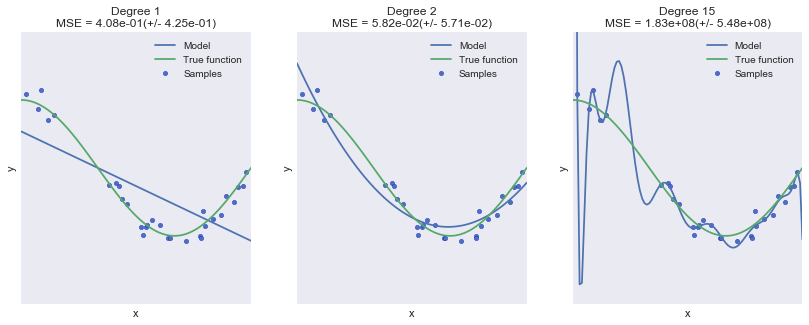

In [3]:
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

# Uncertainty with modelling



$$y = f(x) + \epsilon$$

Two sources of uncertainty:

- Did we pick the right model?
    - Model does not have nonlinearity
    - Did not collect the right features


- Is the data that we collected noisy? 
    - Features are noisy
    - Labels are noisy


# What are the sources of error?
<br>


$$y = f(x) + \epsilon$$

$$y \approx \widehat{f}_{w}(x)$$

- What are the sources of error in our approximation? 

$$
\begin{align*}
E[(y-\widehat{f}_{w})^2] &= \text{Var}[y] + E\big\{\big(\widehat{f}_{w} - E^{2}\{\widehat{f}_{w}\}\big)^{2}\big\} + E^{2}[(f-\widehat{f}_{w})]\\
&= \sigma^{2} + \text{Var}[\widehat{f}_{w}] + \text{Bias}[\widehat{f}_{w}]
\end{align*}
$$

- Irreducible error: $\sigma^{2}$ this is measurement noise and there is little we can do about it (without using specialized knowledge)



- Bias: the mismatch between our model assumption and the true underlying input and output relationship
  - When both the training and test error are bad (compared to random baseline), we are likely in a high bias regime 
- Variance: sensitivity of model behavior changes between the training data and test data 
  - When the training error is very low but the test error is high, we are likely in the high variance regime
  
  
- Influential summary: Advice for Apply Machine Learning by Andrew Ng 
  - http://cs229.stanford.edu/materials/ML-advice.pdf

Lucas笔记：参考http://www.cnblogs.com/kemaswill/archive/2013/06/15/3138170.html 

<img src="./imgs/lecture-2/bias-and-variance.jpg">

# Learning curves: how does error change as we increase data size?

- High bias learning curve example:

<img src="./imgs/lecture-3/high-bias.png">

- Getting more data will not help 
- Try increase the feature complexity
  - Collect more features
  - Non-linear model

# Learning curves: how does error change as we increase data size?

- High variance learning curve examples

<img src="./imgs/lecture-3/high-variance.png">

- Collect more data
- Regularize the model and features

<img src="./imgs/lecture-2/model-complexity.png">

# Bias and variance in ridge regression

- In ridge regression, we seek solutions 
$$\begin{aligned}
\underset{w}{\text{argmin}} & \Bigg\{\sum_{i=1}^{N}(y_i - x_i^{T}w)^2 + \theta \lVert w \lVert_{2}^{2}\Bigg\}
\end{aligned}$$ 


- How does varying $\theta$ impact the error?



- For very large $\theta$, the $\lVert w \lVert_{2}^{2}$ term dominates
  - The optimal solution will be $w = 0$
  - This will be low (zero) variance, but high bias solution
  
  
- For very small $\theta$, the $\sum_{i=1}^{N}(y_i - x^{T}w)^2$ term dominates
   - The optimal solution will ignore the regularization term and greedily minimize loss
   - If we have a large number of features, this can lead to a low bias solution, but may have high variance
   

- In ridge regression, the hyper parameter $\theta \in \mathbb{R}$ serves as a tuning parameter to trade-off between high bias and high variance solutions


- There may be many different ways to select the regularization penalty and we may have many hyper parameters that describe it

In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


digits = load_digits()
X, y = digits.data, digits.target

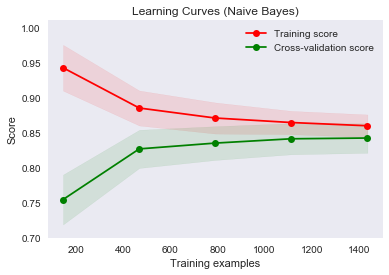

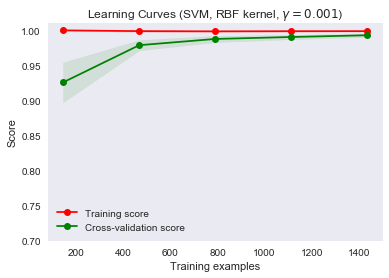

In [5]:
title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4);

title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4);

In [6]:
%%time 
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

digits = load_digits()
X, y = digits.data, digits.target

param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="gamma", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

Wall time: 35.1 s


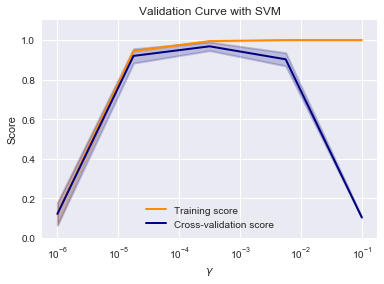

In [7]:
plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best");

# Logistic regression

- In regression the output $y \in \mathbb{R}$ is a continuous variable.


- In binary classification, the output $y \in \{0, 1\}$ is in a set of categories
  - positive vs. negative class
  - Detecting fraud, cancer, etc.
  
- It may be tempting to use the machinery of linear regression to fit a linear function between the input and output as we did for OLS or Ridge Regression:

$$ y = w_{0} + \sum_{i=1}^{n}w_{i}x_{i}$$

- The output of linear function is a continuous variable in $\mathbb{R}$. For solving classification problems we need to decide how we are going to translate this continuous output into a discrete decision

- In logistic regression, this is done via the *sigmoid* or *logistic* function. This function for $z \in \mathbb{R}$ is defined as

$$\phi(z) = \frac{1}{1+e^{-z}}$$

- So to have solve classification problems, we set $z = w_{0} + \sum_{i=1}^{n}w_{i}x_{i}$

- The origin of the sigmoid comes from modeling the log-odds of a binary event

$$\text{log}\big(\frac{p}{1-p}\big) =   w_{0} + \sum_{i=1}^{n}w_{i}x_{i}$$

- Typically $p$ is the probability of the positive class
  - Probability email is spam, transaction is fraud, tumor is cancerous

- Solving for $p$ yields the logistic function  

- Similar to linear regression, we will write this more compactly as:

$$ p = \phi(w^{T}x)$$ 



In [8]:
from sklearn import linear_model

# this is our test set, it's just a straight line with some
# Gaussian noise
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(np.float)
X[X > 0] *= 4
X += .3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]
# run the classifier
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, y);

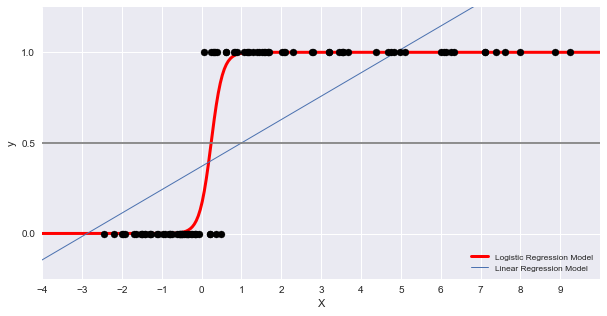

In [9]:
plt.figure(figsize=(10, 5))

# and plot the result
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X.ravel(), y, color='black', zorder=20)
X_test = np.linspace(-5, 10, 300)


def model(x):
    return 1 / (1 + np.exp(-x))
loss = model(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)

ols = linear_model.LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
plt.axhline(.5, color='.5')

plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(-4, 10)
plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
           loc="lower right", fontsize='small');

# Cross entropy loss function

- For logistic regression, the cross entropy loss is a popular loss function used:

$$L_{i}(w) = -y_{i}\text{log}\big(\phi(w^{T}x_{i})\big) - (1 - y_{i})\text{log}(1 - \phi(w^{T}x_{i})\big)$$ 

- This loss is then used to minimize the empirical risk:

$$\begin{aligned}
\underset{w}{\text{argmin}} & \Bigg\{\sum_{i=1}^{N}L_{i}(w) + \theta \lVert w \lVert_{2}^{2}\Bigg\}
\end{aligned}$$ 

- Note that again we again have a regularization term $\lVert w \lVert_{2}^{2}$ so sometimes this is referred to as "ridge" logistic regression

- Solved iteratively with various solvers:
   - SGD, Gauss-Newton, Conjugate Gradient Descent, etc.


# Feature engineering: foreshadowing neural networks


- As discussed, coming up with relevant features is very important 

- Some domain knowledge can be helpful and we can engineer some features
  - Polynomials, logs, exponetials, etc.
  
  
- Coming up with these different features can be challenging. One idea is to transform the input into a latent space by using random basis functions followed by a non-linearity. Once the input is transformed the latent representation, we apply OLS.

$$\textbf{z} = \tanh(\textbf{W}_{0}x)$$

$$y = \textbf{W}_{1}\textbf{z}$$

- where the elements of $\textbf{W}_{0} \in \mathbf{R}^{M\times n}$ are drawn IID from $\sim N(0, \sigma)$ and scaled (or "regularized") by $\frac{1}{M}$ 


- $M$ corresponds to the number of hidden neurons or units. $\textbf{W}_{1} \in \mathbf{R}^{1\times (M+1)}$ then is found using an OLS solver.


- So the parameters that allow us to vary between bias and variance are:
  - $M$: the number of hudden neurons
  - $\sigma$: the amoutn of variance of the 

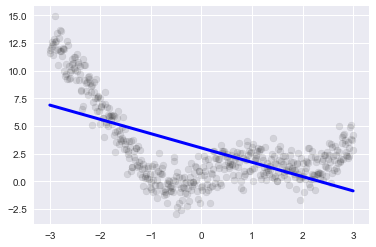

In [10]:
N = 500 # total number of data points
x = np.linspace(start = -3, stop = 3, num = N)
y_orig = .3 + -1*x + .9*x**2 + 2*np.sin(2*3.14*.3*x)
## Add white noise
y =  y_orig + np.random.randn(N)

regr = linear_model.LinearRegression()
regr.fit(x[np.newaxis].T, y[np.newaxis].T)
plt.scatter(x, y, color = 'black', alpha= .1)
plt.plot(x[np.newaxis].T, regr.predict(x[np.newaxis].T), color = 'blue', linewidth=3);

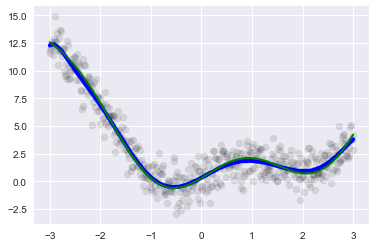

In [11]:
# build design matrix to append bias (1's)
X = np.hstack((x[np.newaxis].T, np.ones((N,1))))


M = 10 # number of hidden nodes
## setup random weights to project data
weights = 1./M*np.random.randn(M,2)


Z = np.tanh(np.dot(X,weights.T))


regr = linear_model.LinearRegression()
regr.fit(Z, y[np.newaxis].T)
plt.scatter(x, y, color = 'black', alpha= .1)
plt.plot(x[np.newaxis].T, regr.predict(Z), color = 'blue', linewidth=4)
plt.plot(x, y_orig, color = 'green', linewidth = 2);

In [29]:
weights

array([[-0.00960665, -0.08432266],
       [ 0.06884077, -0.03339405],
       [-0.03491233,  0.18789034],
       [ 0.05128935, -0.15982906],
       [ 0.06216709, -0.07862615],
       [ 0.0184379 ,  0.05058166],
       [-0.07671087,  0.05144232],
       [-0.00178198,  0.16734881],
       [-0.02093202, -0.0760609 ],
       [ 0.05490374,  0.16107281]])

# K-Nearest Neighbors 

- Given a data set $T = \{(x_i, y_i)\}$ 


- When we want to query a new point $x_q$, we seek the "k nearest neighbors" of $x_q$ in our data set $T$
    - Euclidean distance is popular
    - Many other distances can be considered 


- If we are solving a classification problem, we take the majority vote $y_{i}$ that are in the $k$ nearest neighbors



- In regeression we can take the average of the $y_{i}$ values
  - Or median, mode, etc...
  - May also consider more sophisticated ideas like building a linear regression model based only on the $k$ nearest neighbors
  
  
- The number of neighbors $k$ allows us to vary between bias and variance
  - Low $k$, high variance
  - High $k$, high bias



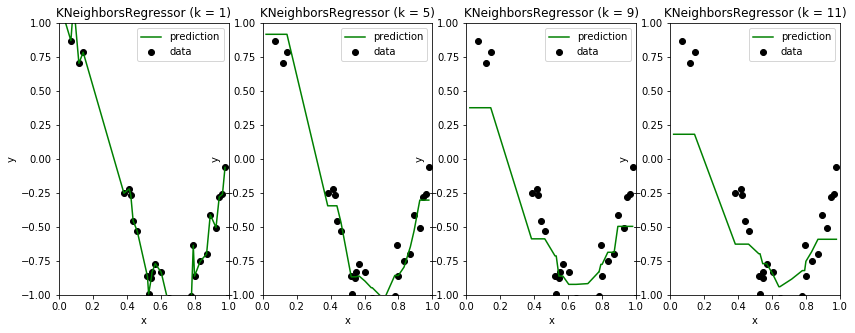

In [12]:
plt.figure(figsize=(14, 5))
from sklearn import neighbors

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

# #############################################################################
# Fit regression model
n_neighbors = [1, 5, 9, 11]

for i, n_neighbor in enumerate(n_neighbors):
    knn = neighbors.KNeighborsRegressor(n_neighbor)
    y_ = knn.fit(X[:,np.newaxis], y).predict(X[:,np.newaxis])

    plt.subplot(1, len(n_neighbors), i + 1)
    plt.scatter(X, y, c='k', label='data')
    plt.plot(X, y_, c='g', label='prediction')
    #plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i)" % (n_neighbor))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-1, 1))
    plt.legend(loc="best")


# Decision Trees




- In decision trees, the input space $x \in \mathbb{R}^{n}$ are carved up into specific regions


$$ f(x) = \sum_{m=1}^{M}c_{m}I(x \in R_{m})$$

- $R_m$ are the different regions of the input space and are subsets of the input space $R_{m} \subset \mathbb{R}^n$


- $m = 1, \ldots, M$ refer to the $M$ different regions that input space has been carved up into 


- $I(\cdot)$ is an indicator function. It's value is 1.0 is if $x \in R_{m}$ and 0 otherwise


- $c_m \in \mathbb{R}$ is the output value of the function for a given input $x \in \mathbb{R}^n$

<img src="./imgs/lecture-3/decision-regions.png" height="400" width="400">

- In practice, each region is determined in a greedy fashion by each input variable individually 

- We also restrict the tree to be a binary tree

<img src="./imgs/lecture-3/binary-tree.png" height="400" width="400">

# Example: classify good vs. bad foods

- Red dots: grade "a" food ("healthy" food)
- Cyan dots: grade "e" food (not healthy)

<img src="./imgs/lecture-3/food-data.png" height="600" width="600">



- Can we split the data into cohesive groups?
  - Split data into pure sections
  - Make decision based on split decision
  - Adjust split to get most “purity” between classes
  


<img src="./imgs/lecture-3/finding-first-split.png" height="600" width="600">

- Continue to split each input variable into rectangular regions
- Can do this in a greedy fashion

<img src="./imgs/lecture-3/second-split.png" height="600" width="600">

- Decision trees can be very complex (very deep), but this is usually does not generalize well
- The depth of the tree is the complexity parameter that allows us to vary between high bias and high variance models

<img src="./imgs/lecture-3/deep-tree.png" height="600" width="600">

- Each split is made to make the distribution of the trees to increase the "purity" of the region

<img src="./imgs/lecture-3/decision-tree.png" height="600" width="600">

# Classification Trees

- In classification trees, the output of the tree is determined by voting for the majority of the classes


- The measure of purity can be made using  Gini index for $K$ classes at the leaves in depth $m$:

$$\sum_{k=1}^{K} p_{mk}(1 - p_{mk})$$
  
  
- Find a split that minimizes the Gini index. Alternatively, we can use entropy over the $K$ classes at the leaves in depth $m$

$$-\sum_{k=1}^{K}p_{mk}\text{log}(p_{mk})$$



# Why is misclassification a bad criterion for splitting?


- Misclassification error can also be used as a splitting criterion but does not actually lead to "pure" leaves
  - Consider 2-class problem with 400 samples in each class (so 800 data points total)
  - We start with a partition of 400 positive and 400 negative classes (400, 400) (maximum Gini, entropy, and misclassification error)
  - One split paritions the data as (300,100) and (100,300)
  - Another split partitions the data as (200, 400) and (200, 0)
  - Both splits have a misclassificaiton of 0.25, but we prefer the latter split since one branch leads to a more "pure" distribution of classes 

# Regression Trees

- In regression trees, the output of the of the tree are the average values at the leaves


- Some also use other centralized statistics such as median or mode


- Even more exotic models build a linear regression model at the leaves


- A measure of purity for the splitting criterion can be the variance or standard deviance (information theoretic measures are also often used)

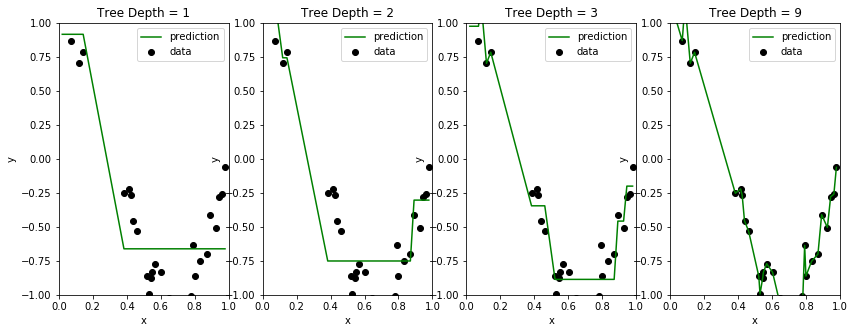

In [13]:
plt.figure(figsize=(14, 5))
from sklearn.tree import DecisionTreeRegressor

# #############################################################################
# Fit regression model
depths = [1, 2, 3, 9]

for i, depth in enumerate(depths):
    dt = DecisionTreeRegressor(max_depth=depth)
    y_ = dt.fit(X[:,np.newaxis], y).predict(X[:,np.newaxis])

    plt.subplot(1, len(depths), i + 1)
    plt.scatter(X, y, c='k', label='data')
    plt.plot(X[:,np.newaxis], y_, c='g', label='prediction')
    plt.legend()
    plt.title("Tree Depth = %i" % (depth))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-1, 1))
    plt.legend(loc="best")

# Decision Trees Advantages

- Features can be any type (numerical or categorical), including missing values


- Trees can be often interpretable 



- Robust to different scalings of the data


# So many models, which to pick?

- Does averaging models help? 

- Usually, averaging models improves the model variance (not necessarily bias)

$$y \approx \widehat{f}_{B}(x)$$


$$ \widehat{f}_{B}(x) = \frac{1}{B}\sum_{j=1}^{B}f_{j}(x)$$

- What are the sources of error in our approximation? 

$$
\begin{align*}
E[(y-\widehat{f}_{B})^2] &= \text{Var}[y] + E\big\{\big(\widehat{f}_{B} - E^{2}\{\widehat{f}_{B}\}\big)^{2}\big\} + E^{2}[(f-\widehat{f}_{B})]\\
&= \sigma^{2} + \text{Var}[\widehat{f}_{B}] + \text{Bias}[\widehat{f}_{B}]
\end{align*}
$$


- For "uncorrelated" estimators $f_{j}(x)$, as we increase $B$ the variance term will decrease
  - Another way of saying this is that we want the estimators $f_{j}$ to be different and diverse



- Bagging, short for bootstrapped aggregation, is a method for developing many such diverse estimators   
  - Resample the training data (with replacement) many times and build a separate model for each sample
  - Aggregate all the models

<img src="./imgs/lecture-3/bootstrap-sample.png" height="600" width="600">

<img src="./imgs/lecture-3/boot-600x713.png" height="600" width="600">

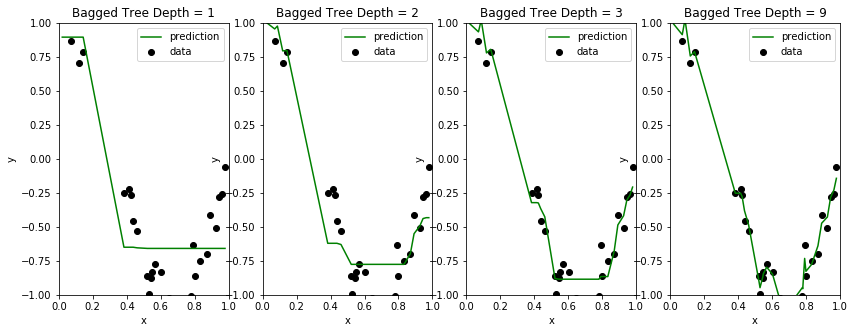

In [14]:
plt.figure(figsize=(14, 5))

from sklearn.ensemble import BaggingRegressor

# #############################################################################
# Fit regression model
depths = [1, 2, 3, 9]

for i, depth in enumerate(depths):
    dt = BaggingRegressor(DecisionTreeRegressor(max_depth=depth), n_estimators=100)
    y_ = dt.fit(X[:,np.newaxis], y).predict(X[:,np.newaxis])

    plt.subplot(1, len(depths), i + 1)
    plt.scatter(X, y, c='k', label='data')
    plt.plot(X[:,np.newaxis], y_, c='g', label='prediction')
    plt.legend()
    plt.title("Bagged Tree Depth = %i" % (depth))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-1, 1))
    plt.legend(loc="best")